In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 100
%matplotlib inline

In [22]:
data = pd.read_csv('news.csv')

In [23]:
data.head()

,news_headline,news_article,news_category,full_text,clean_text
0,World's cheapest phone 'Freedom 251' maker's founder arrested,"The maker of world's cheapest smartphone 'Freedom 251' priced at ₹251, Ringing Bells' founder Mo...",technology,World's cheapest phone 'Freedom 251' maker's founder arrested. The maker of world's cheapest sma...,world cheapest phone freedom maker founder arrest maker world cheapest smartphone freedom price ...
1,"US unveils world's most powerful supercomputer, beats China","The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previou...",technology,"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's mos...",us unveils world powerful supercomputer beat china us unveil world powerful supercomputer call s...
2,FB bug changed 1.4 cr users’ privacy setting to ‘public’,Facebook has said it recently found a bug that automatically suggested posting publicly when peo...,technology,FB bug changed 1.4 cr users’ privacy setting to ‘public’. Facebook has said it recently found a ...,fb bug change cr user privacy set public facebook say recently find bug automatically suggest po...
3,Contest for 1st couple to marry in self-driving car launched,The American Automobile Association has launched a contest to find the first couple to get marri...,technology,Contest for 1st couple to marry in self-driving car launched. The American Automobile Associatio...,cont st couple marry self drive car launch american automobile association launch contest find f...
4,China's ZTE to pay $1 billion fine to US to lift sanctions,Chinese telecommunications equipment maker ZTE has agreed to a $1 billion fine to end US sanctio...,technology,China's ZTE to pay $1 billion fine to US to lift sanctions. Chinese telecommunications equipment...,china zte pay billion fine us lift sanction chinese telecommunications equipment maker zte agree...


In [24]:
data.iloc[1]['news_headline']

"US unveils world's most powerful supercomputer, beats China"

In [25]:
data.iloc[1]['news_article']

"The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [26]:
data.iloc[1]['full_text']

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [27]:
data.iloc[1]['clean_text']

'us unveils world powerful supercomputer beat china us unveil world powerful supercomputer call summit beat previous record holder china sunway taihulight peak performance trillion calculation per second twice fast sunway taihulight capable trillion calculation per second summit server reportedly take size two tennis court'

In [28]:
data.iloc[1]['news_category']

'technology'

In [29]:
articles, labels = np.array(data['clean_text']), np.array(data['news_category'])

In [32]:
from sklearn.model_selection import train_test_split

train_articles, test_articles, train_labels, test_labels = train_test_split(articles, labels, random_state=42, test_size=0.3)

In [34]:
print('Train data size:', train_articles.shape, train_labels.shape)
print('Test data size:', test_articles.shape, test_labels.shape)

Train data size: (51,) (51,)
Test data size: (23,) (23,)


In [37]:
from collections import Counter

print('Train news article categories:', Counter(train_labels))
print('Test news article categories:', Counter(test_labels))

Train news article categories: Counter({'world': 18, 'sports': 18, 'technology': 15})
Test news article categories: Counter({'technology': 9, 'world': 7, 'sports': 7})


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
train_features = cv.fit_transform(train_articles)
train_features = train_features.toarray()
train_features, train_features.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64), (51, 957))

In [55]:
vocabulary = cv.get_feature_names()
print(vocabulary[:20])
print('Total Vocabulary size (unique words):', len(vocabulary))

['abdul', 'able', 'academy', 'accept', 'access', 'accommodation', 'accord', 'account', 'accuse', 'acharya', 'act', 'active', 'add', 'address', 'adviser', 'affair', 'affect', 'africa', 'afridi', 'afternoon']
Total Vocabulary size (unique words): 957


In [45]:
feature_frame = pd.DataFrame(train_features, columns=vocabulary)
feature_frame.head(10)

,abdul,able,academy,accept,access,accommodation,accord,account,accuse,acharya,...,would,write,wrote,wuhan,xi,yahoo,year,yes,young,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
train_articles[0]

'nadal rd tennis player earn million prize money follow th french open title world number one rafael nadal become third player roger federer novak djokovic earn million prize money year old win tournament award million title win notably djokovic become first tennis player earn million june'

In [49]:
feature_frame.iloc[0][feature_frame.iloc[0] > 0]

award         1
become        2
djokovic      2
earn          3
federer       1
first         1
follow        1
french        1
june          1
million       4
money         2
nadal         2
notably       1
novak         1
number        1
old           1
one           1
open          1
player        3
prize         2
rafael        1
rd            1
roger         1
tennis        2
th            1
third         1
title         2
tournament    1
win           2
world         1
year          1
Name: 0, dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [54]:
test_features = cv.transform(test_articles)
test_features = test_features.toarray()
test_features, test_features.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64), (23, 957))

In [56]:
predictions = dt.predict(test_features)
predictions[:10]

array(['sports', 'sports', 'technology', 'world', 'sports', 'world',
       'sports', 'sports', 'technology', 'world'], dtype=object)

In [57]:
import model_evaluation_utils as meu

In [59]:
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, classes=list(set(labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.6957
Precision: 0.8088
Recall: 0.6957
F1 Score: 0.688

Model Classification report:
------------------------------
             precision    recall  f1-score   support

      world       0.83      0.71      0.77         7
 technology       1.00      0.44      0.62         9
     sports       0.54      1.00      0.70         7

avg / total       0.81      0.70      0.69        23


Prediction Confusion Matrix:
------------------------------
                   Predicted:                  
                        world technology sports
Actual: world               5          0      2
        technology          1          4      4
        sports              0          0      7


In [64]:
news_predictions = pd.DataFrame({'Article': test_articles, 
                                 'Actual News Category': test_labels, 
                                 'Predicted News Category': predictions})

news_predictions[['Article', 'Actual News Category', 'Predicted News Category']]

,Article,Actual News Category,Predicted News Category
0,china zte pay billion fine us lift sanction chinese telecommunications equipment maker zte agree...,technology,sports
1,us like piggy bank everyone rob trump slam nation brutal approach conducting trade country presi...,world,sports
2,apple may introduce touch sensitive side button watch apple reportedly replace physical button a...,technology,technology
3,world cheapest phone freedom maker founder arrest maker world cheapest smartphone freedom price ...,technology,world
4,th rank scotland score beat no england run scotland placed th odi ranking defeated top rank engl...,sports,sports
5,pray us n korea summit lead peace pope francis pope franci sunday say pray upcoming summit us pr...,world,world
6,man post video control iphone eye developer name matt moss post video twitter show control iphon...,technology,sports
7,inzamam changed field let hit six sehwag former indian cricketer virender sehwag reveal pakistan...,sports,sports
8,startup sue apple copy logo shortcut app startup named shift sue apple copy logo company shortcu...,technology,technology
9,man jump death meccas grand mosque man jump roof grand mosque muslim holy city mecca friday body...,world,world


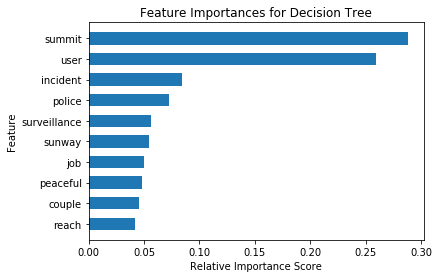

In [68]:
dt_feature_importances = dt.feature_importances_
dt_feature_names, dt_feature_scores = zip(*sorted(zip(vocabulary, dt_feature_importances), 
                                                          key=lambda x: x[1]))

dt_feature_names, dt_feature_scores = dt_feature_names[-10:], dt_feature_scores[-10:]
y_position = list(range(len(dt_feature_names)))
plt.barh(y_position, dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')